In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=40,
                                   fill_mode='nearest',
                                  )
train_generator = train_datagen.flow_from_directory('training',
                                                   target_size=(300,300),
                                                   batch_size=128,
                                                   class_mode='categorical')

Found 243389 images belonging to 60 classes.


In [13]:
                                  
validation_generator = train_datagen.flow_from_directory('validation',
                                                   target_size=(300,300),
                                                   batch_size=128,
                                                   class_mode='categorical')

Found 60820 images belonging to 60 classes.


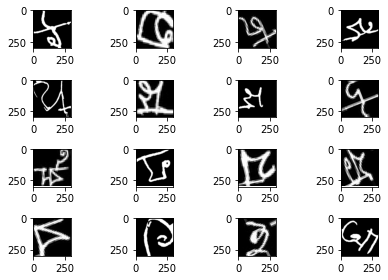

In [14]:

for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    x = train_generator.next()
    image = x[0][0]
    plt.imshow(image)
plt.tight_layout()
plt.show()


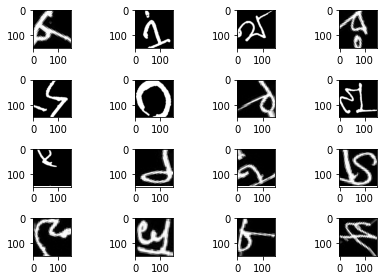

In [6]:
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    x = validation_generator.next()
    image = x[0][0]
    plt.imshow(image)
plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.optimizers import RMSprop


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(60, activation='softmax')
])
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['acc']
    )

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/10
